# First Mini Project (JSON Based Data Solution)

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline

data= json.load((open('world_bank_projects.json')))

In [2]:
df= pd.read_json('world_bank_projects.json')
df.shape

(500, 50)

In [3]:
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


# 1- Find the 10 countries with most projects 

In [4]:
df['countryname'].value_counts().head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [5]:
# Africa is not a country, it should be dropped
Question1=df['countryname'].value_counts().drop('Africa').head(10)
print(Question1)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Republic of Mozambique             11
Federative Republic of Brazil       9
Name: countryname, dtype: int64


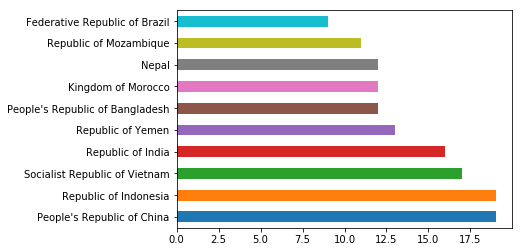

In [6]:
Question1.plot.barh()

In [7]:
#Another way to solve question 1
Question1=df.groupby('countryname')['project_name'].count()
Question1=Question1.drop('Africa').nlargest(10)
Question1

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Burkina Faso                        9
Name: project_name, dtype: int64

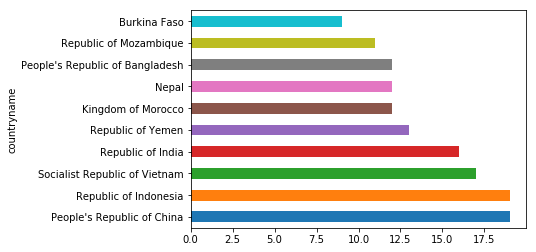

In [8]:
Question1.plot.barh()

# 2- Find the top 10 major project themes (using column 'mjtheme_namecode')

In [9]:
# use normalization to create tables from nested element
data_norm= json_normalize(data, 'mjtheme_namecode')
df2=data_norm.name.value_counts()[:10] #Find the total count of each project
df2 # This is not correct, beacuse some rows are without name

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [10]:
#Find the total count of each project
df2=data_norm.code.value_counts()[:10] 
df2 #This is correct value counts of each project base on their code

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

In [11]:
#Making a new dataframe to show to code, name and value_counts in order
Question2=data_norm[['code','name']].drop_duplicates().query("name != ''")[:10].set_index('code').reindex(df2.index)
Question2.index.name='code'
Question2['Value']=df2
Question2

,name,Value
code,,
11,Environment and natural resources management,250
10,Rural development,216
8,Human development,210
2,Public sector governance,199
6,Social protection and risk management,168
4,Financial and private sector development,146
7,Social dev/gender/inclusion,130
5,Trade and integration,77
9,Urban development,50


# 3-  In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [12]:
#number of missing names
missing=data_norm[data_norm.name=='']
missing.shape 

(122, 2)

In [13]:
data_norm.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [14]:
#Creat a dictionay base on unique values of code
dict1={}
for i in data_norm.code.unique():
    dict1[i]=data_norm[data_norm.code==i].name.iloc[0]
dict1

{'8': 'Human development',
 '11': '',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [15]:
# correcting the  code 11 in the dictionay
dict1['11']='Environment and natural resources management'
dict1

{'8': 'Human development',
 '11': 'Environment and natural resources management',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [16]:
data_norm['name']=data_norm['code'].apply(lambda x:dict1[x])
data_norm.head(10)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [17]:
#number of missing names after filling is zero
missing=data_norm[data_norm.name=='']
missing.shape 

(0, 2)

In [18]:
data_norm.name.value_counts()[:10]

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

In [19]:
#Another way to solve question 3
Question2=data_norm[['code','name']].drop_duplicates().query("name != ''")
Question3=data_norm.merge(Question2,on='code')[['code','name_y']]
Question3.columns=['code','name']
Question3.groupby('name').size().sort_values(ascending=False)[:10]

name
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
dtype: int64

In [20]:
#Another way to solve question 3

list1=[]
list2=[]

n=df.shape[0]
for i in range(n):
    list1.append(len(df['mjtheme_namecode'][i]))  #List1 is the Total number of codes in each row

for i,j in enumerate(list1):
    for num in range(j):
        list2.append(df['mjtheme_namecode'][i][num]['code'])  #extracting 
        
list2=pd.to_numeric(list2)
unique, counts = np.unique(list2, return_counts=True)
d=dict(zip(unique, counts))
d=OrderedDict(sorted(d.items(), key=lambda t: t[1],reverse=True))
d

OrderedDict([(11, 250),
             (10, 216),
             (8, 210),
             (2, 199),
             (6, 168),
             (4, 146),
             (7, 130),
             (5, 77),
             (9, 50),
             (1, 38),
             (3, 15)])